## Introduction to Statistical Learning - Homework 
### Fernando Delgado

#### Resampling Methods

We now review k-fold cross-validation.
* (a) Explain how k-fold cross-validation is implemented.
* (b) What are the advantages and disadvantages of k-fold crossvalidation relative to:
    * i. The validation set approach?
    * ii. LOOCV?

In [1]:
# a)

## for the k-fold cross-validation we must randomly divide the set of observations into n groups (folds)
## of aprox the same size. 
## The first group is for validation, and then we fit the method on the remaining n − 1 groups. 
## THen, we calculate the mean squared error on the observations in the remaining groups and repeat this n times.
## For each repetition we treat a different group of observations as a validation set. 
## This results in n estimates of the test error.

In [2]:
# b)

## The validation set approach
## Advantages: The validation set approach is easy to implement
## Disadvantages: The validation MSE can have a high variability and you depend on the training data. 

## LOOCV
## Advantages: LOOCV has a lower bias. performing LOOCV multiple times will always display the same results 
## because we always split based on 1 observation
## Disadvantage: LOOCV requires a lot of computer power tom implement and it can be slow

We will now perform cross-validation on a simulated data set.
* (a) Generate a simulated data set as follows:


In [3]:
set.seed(1)
y <- rnorm(100)
x <- rnorm(100)
y <- x - 2 * x^2 + rnorm(100)

In this data set, what is n and what is p? Write out the model
used to generate the data in equation form.
* (b) Create a scatterplot of X against Y . Comment on what you find.


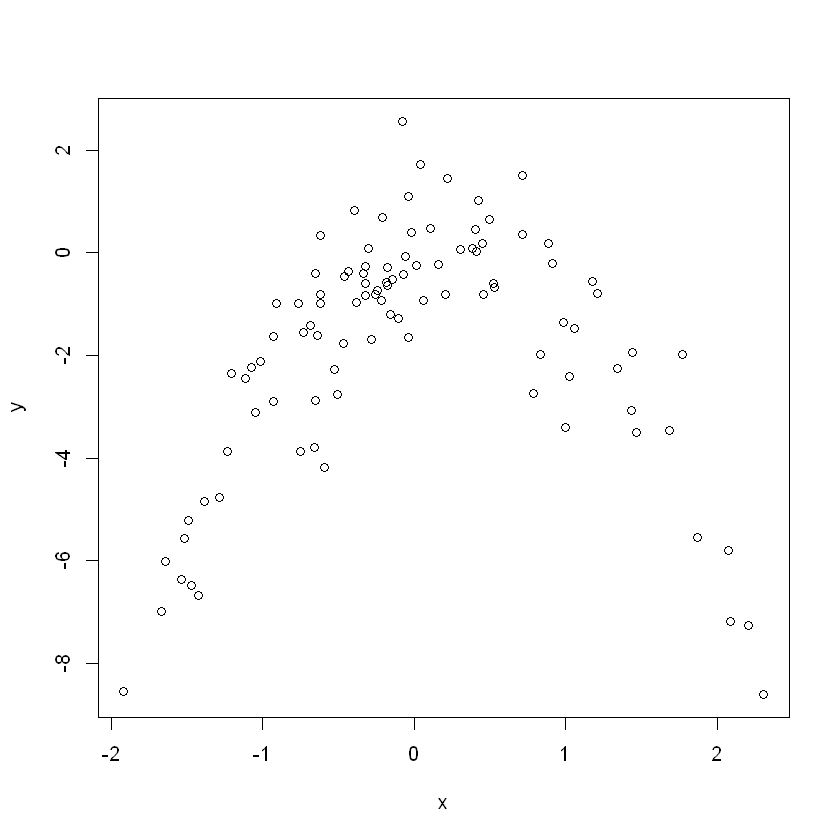

In [4]:
plot(x, y)

* (c) Set a random seed, and then compute the LOOCV errors that result from fitting the following four models using least squares:
m
    * i. Y = β0 + β1X + 
    * ii. Y = β0 + β1X + β2X2 + 
    * iii. Y = β0 + β1X + β2X2 + β3X3 + 
    * iv. Y = β0 + β1X + β2X2 + β3X3 + β4X4 + .

In [5]:
library(boot)
set.seed(123)

#1)
df <- data.frame(x, y)
fit.glm.1 <- glm(y ~ x)
cv.glm(df, fit.glm.1)$delta[1]

[1] 5.890979

In [6]:
#2)
fit.glm.2 <- glm(y ~ poly(x, 2))
cv.glm(df, fit.glm.2)$delta[1]

[1] 1.086596

In [7]:
#3)
fit.glm.3 <- glm(y ~ poly(x, 3))
cv.glm(df, fit.glm.3)$delta[1]

[1] 1.102585

In [8]:
#4) 
fit.glm.4 <- glm(y ~ poly(x, 4))
cv.glm(df, fit.glm.4)$delta[1]

[1] 1.114772

Note you may find it helpful to use the data.frame() function
to create a single data set containing both X and Y .
* (d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?


In [9]:
set.seed(6)

#1)
df <- data.frame(x, y)
fit.glm.1 <- glm(y ~ x)
cv.glm(df, fit.glm.1)$delta[1]

#2)
fit.glm.2 <- glm(y ~ poly(x, 2))
cv.glm(df, fit.glm.2)$delta[1]

#3)
fit.glm.3 <- glm(y ~ poly(x, 3))
cv.glm(df, fit.glm.3)$delta[1]

#4) 
fit.glm.4 <- glm(y ~ poly(x, 4))
cv.glm(df, fit.glm.4)$delta[1]

[1] 5.890979

[1] 1.086596

[1] 1.102585

[1] 1.114772

In [10]:
# The results are the same because LOOCV evaluates n folds of 1 obs

* (e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.


In [11]:
# We observe the second one is the smallest which could be due to the plot observed in b) being a parabolla

* (f) Comment on the statistical significance of the coefficient estimates that results from fitting each of the models in (c) using least squares. Do these results agree with the conclusions drawn based on the cross-validation results?

In [12]:
summary(fit.glm.4)


Call:
glm(formula = y ~ poly(x, 4))

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.8914  -0.5244   0.0749   0.5932   2.7796  

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.8277     0.1041 -17.549   <2e-16 ***
poly(x, 4)1   2.3164     1.0415   2.224   0.0285 *  
poly(x, 4)2 -21.0586     1.0415 -20.220   <2e-16 ***
poly(x, 4)3  -0.3048     1.0415  -0.293   0.7704    
poly(x, 4)4  -0.4926     1.0415  -0.473   0.6373    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for gaussian family taken to be 1.084654)

    Null deviance: 552.21  on 99  degrees of freedom
Residual deviance: 103.04  on 95  degrees of freedom
AIC: 298.78

Number of Fisher Scoring iterations: 2


In [13]:
# The only significant p-values are the intercept, the 1st and the second.
# This makes sense with the previous results which were the lowest for the second model.

#### Linear Model Selection and Regularization

We perform best subset, forward stepwise, and backward stepwise selection on a single data set. For each approach, we obtain p + 1 models, containing 0, 1, 2, . . . , p predictors. Explain your answers:
* (a) Which of the three models with k predictors has the smallest training RSS?


In [14]:
# The smallest training RSS will be for the best subset approach
# because the model will be chosen after considering all the possible k parameters for best subset. 
# However, This does not apply for either backward stepwise or forward stepwise.

* (b) Which of the three models with k predictors has the smallest test RSS?


In [15]:
## The best subset approach will select a model with k predictors from all 
## possible combinations for k predictors with training RSS. 
## For forward and backward stepwise approach this might not be nessassrily true for test RSS.

## thus, there is no way of knowing

* (c) True or False:
    * i. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the (k+1)-variable model identified by forward stepwise selection.
    

In [16]:
# TRUE

* ii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)- variable model identified by backward stepwise selection.
    

In [17]:
# TRUE

* iii. The predictors in the k-variable model identified by backward stepwise are a subset of the predictors in the (k + 1)- variable model identified by forward stepwise selection.
    

In [18]:
# FALSE

* iv. The predictors in the k-variable model identified by forward stepwise are a subset of the predictors in the (k+1)-variable model identified by backward stepwise selection.
    

In [19]:
# FALSE

* v. The predictors in the k-variable model identified by best subset are a subset of the predictors in the (k + 1)-variable model identified by best subset selection.

In [20]:
# FALSE

In this exercise, we will predict the number of applications received
using the other variables in the College data set.
* (a) Split the data set into a training set and a test set.

In [21]:
library(ISLR)
attach(College)
set.seed(123)

#Randomly splitting data into trainig and test set with 70%/30%
subset <- sample(nrow(College),nrow(College)*0.7)
train <- College[subset,]
test <- College[-subset,]

* (b) Fit a linear model using least squares on the training set, and report the test error obtained.


In [22]:
ls.full<-lm(Apps~.,data=train)
summary(ls.full)


Call:
lm(formula = Apps ~ ., data = train)

Residuals:
    Min      1Q  Median      3Q     Max 
-5090.2  -445.7   -32.9   371.5  6934.7 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.118e+02  5.315e+02  -0.587 0.557673    
PrivateYes  -5.306e+02  1.838e+02  -2.887 0.004055 ** 
Accept       1.677e+00  5.130e-02  32.696  < 2e-16 ***
Enroll      -1.345e+00  2.503e-01  -5.373 1.17e-07 ***
Top10perc    6.342e+01  7.056e+00   8.989  < 2e-16 ***
Top25perc   -2.215e+01  5.752e+00  -3.851 0.000132 ***
F.Undergrad  1.065e-01  4.804e-02   2.217 0.027061 *  
P.Undergrad  7.098e-03  5.427e-02   0.131 0.896005    
Outstate    -9.784e-02  2.492e-02  -3.927 9.77e-05 ***
Room.Board   1.357e-01  6.385e-02   2.125 0.034068 *  
Books       -2.035e-01  3.352e-01  -0.607 0.544074    
Personal     1.461e-01  9.088e-02   1.608 0.108475    
PhD         -9.598e+00  5.962e+00  -1.610 0.108033    
Terminal    -7.469e-01  6.563e+00  -0.114 0.909426    
S.F.Ratio    1.392e+01

In [23]:
predicted.apps <- predict(ls.full,test)
testerror <- mean((test$Apps-predicted.apps)^2)
testerror

[1] 680349.5

* (c) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [24]:
#create matrix
train.mat<-model.matrix(Apps~.,data=train)
test.mat<-model.matrix(Apps~.,data=test)

#defining grid 
grid<-10^seq(4,-2,length=100)

#ridge regression model
library(glmnet)
ridge<-glmnet(train.mat,train$Apps,alpha=0,lambda=grid,thresh = 1e-12)
#doing cross validation on model
cv.ridge<-cv.glmnet(train.mat,train$Apps,alpha=0,lambda=grid,thresh=1e-12)

#finding the lambda for which cv error is minimum on training data
bestlam.ridge<-cv.ridge$lambda.min
bestlam.ridge

Loading required package: Matrix

Loaded glmnet 4.1-2



[1] 0.01

In [27]:
pred.newridge<-predict(ridge,s=bestlam.ridge,newx =test.mat)

#MSE
mean((test$Apps-pred.newridge)^2)

[1] 680304

* (d) Fit a lasso model on the training set, with λ chosen by crossvalidation. Report the test error obtained, along with the number of non-zero coefficient estimates.

In [30]:
#lasso
lasso<-glmnet(train.mat,train$Apps,alpha=1,lambda=grid,thresh = 1e-12)

#cross vlaidation
cv.lasso<-cv.glmnet(train.mat,train$Apps,alpha=1,lambda=grid,thresh=1e-12)

#find best lambda
bestlam.lasso<-cv.lasso$lambda.min
bestlam.lasso

[1] 0.01

In [32]:
#predict with lambda
pred.newlasso<-predict(lasso,s=bestlam.lasso,newx =test.mat)

#MSE
mean((test$Apps-pred.newlasso)^2)

[1] 680231.6

In [36]:
#coefficients
predict(lasso,s=bestlam.lasso,type="coefficients")

19 x 1 sparse Matrix of class "dgCMatrix"
                       s1
(Intercept) -3.119599e+02
(Intercept)  .           
PrivateYes  -5.306365e+02
Accept       1.677124e+00
Enroll      -1.344497e+00
Top10perc    6.341209e+01
Top25perc   -2.214441e+01
F.Undergrad  1.064107e-01
P.Undergrad  7.114242e-03
Outstate    -9.782167e-02
Room.Board   1.356616e-01
Books       -2.033689e-01
Personal     1.461040e-01
PhD         -9.597043e+00
Terminal    -7.472047e-01
S.F.Ratio    1.391879e+01
perc.alumni -1.081542e+00
Expend       7.558538e-02
Grad.Rate    1.038614e+01

* (e) Fit a PCR model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

In [41]:
pcrmodel <- pcr(Apps~.,data=train,scale=TRUE,validation="CV")

predict.pcr <- predict(pcrmodel,test,ncomp=17)
mean((test$Apps-predict.pcr)^2)

[1] 680349.5

* (f) Fit a PLS model on the training set, with M chosen by crossvalidation. Report the test error obtained, along with the value of M selected by cross-validation.

In [43]:
plsrmodel<-plsr(Apps~.,data=train,scale=TRUE,validation="CV")

predict.plsr<-predict(plsrmodel,test,ncomp=10)
mean((test$Apps-predict.plsr)^2)

[1] 661659.2

* (g) Comment on the results obtained. How accurately can we predict the number of college applications received? Is there much difference among the test errors resulting from these five approaches?

In [45]:
#with R square statistic we can display the accuracy of our predictions:

#Least Square model
test.avg <- mean(test$Apps)
lm.r2 <- 1 - mean((predicted.apps - test$Apps)^2) / mean((test.avg - test$Apps)^2)

#Ridge model
ridge.r2 <- 1 - mean((pred.newridge - test$Apps)^2) / mean((test.avg - test$Apps)^2)

#Lasso model
lasso.r2 <- 1 - mean((pred.newlasso - test$Apps)^2) / mean((test.avg - test$Apps)^2)

#PCR model
pcr.r2 <- 1 - mean((predict.pcr - test$Apps)^2) / mean((test.avg - test$Apps)^2)

#PLS model
pls.r2 <- 1 - mean((predict.plsr - test$Apps)^2) / mean((test.avg - test$Apps)^2)

In [51]:
print (paste0("Least Squares: ", lm.r2))
print (paste0("Ridge Model: ", ridge.r2))
print (paste0("Lasso: ", lasso.r2))
print (paste0("PCR: ", pcr.r2))
print (paste0("PLS: ", pls.r2))

[1] "Least Squares: 0.935583040348704"
[1] "Ridge Model: 0.935587354552808"
[1] "Lasso: 0.935594207457311"
[1] "PCR: 0.935583040348704"
[1] "PLS: 0.937352684869928"


In [52]:
# Lasso model predicts the highest R-Square even though all the models are similar.
# This was expected since the lowest MSE was for Lasso

#### Moving Beyond Linearity

This question uses the variables dis (the weighted mean of distances to five Boston employment centers) and nox (nitrogen oxides concentrationin parts per 10 million) from the Boston data. We will treat dis as the predictor and nox as the response.
* a) Use the poly() function to fit a cubic polynomial regression to predict nox using dis. Report the regression output, and plot the resulting data and polynomial fits. 300 7. Moving Beyond Linearity

In [72]:
#install.packages("leaps")

In [75]:
library(MASS)

In [76]:
set.seed(123)

fit <- lm(nox ~ poly(dis, 3), data = Boston)
summary(fit)


Call:
lm(formula = nox ~ poly(dis, 3), data = Boston)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.121130 -0.040619 -0.009738  0.023385  0.194904 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)    0.554695   0.002759 201.021  < 2e-16 ***
poly(dis, 3)1 -2.003096   0.062071 -32.271  < 2e-16 ***
poly(dis, 3)2  0.856330   0.062071  13.796  < 2e-16 ***
poly(dis, 3)3 -0.318049   0.062071  -5.124 4.27e-07 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06207 on 502 degrees of freedom
Multiple R-squared:  0.7148,	Adjusted R-squared:  0.7131 
F-statistic: 419.3 on 3 and 502 DF,  p-value: < 2.2e-16


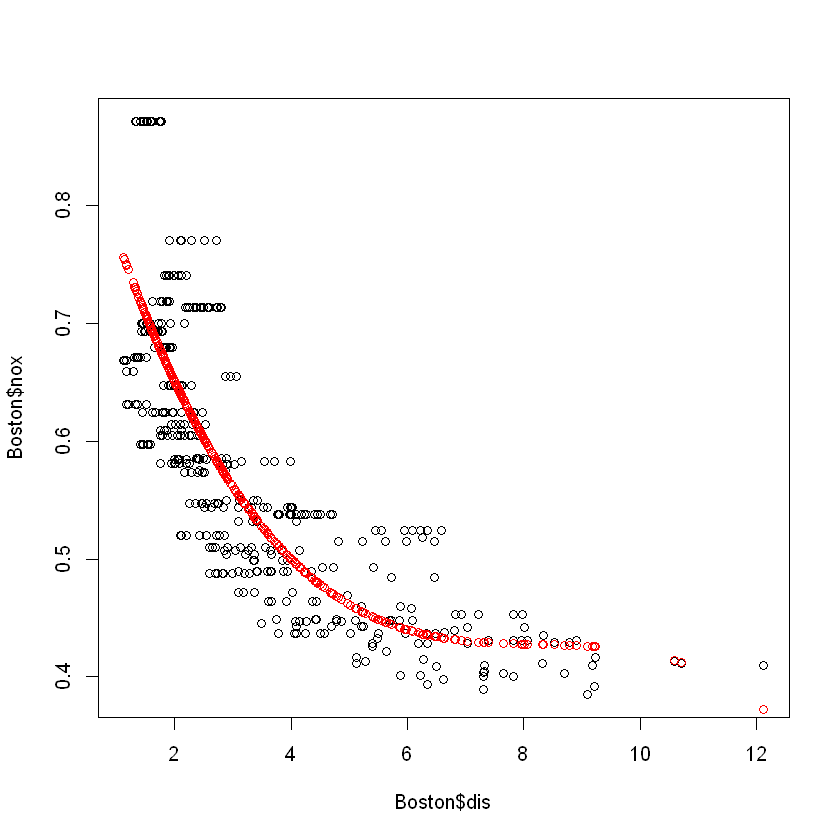

In [82]:
dis.grid <- seq(min(Boston$dis), max(Boston$dis), by = 0.1)

#Prediction
preds <- predict(fit, list(dis = dis.grid), se = TRUE)

se.bands <- cbind(preds$fit + 2* preds$se.fit, preds$fit - 2 * preds$se.fit)

#Plot
plot(Boston$dis, Boston$nox)
points(Boston$dis, fit$fitted.values, col = 'red')

* (b) Plot the polynomial fits for a range of different polynomial degrees (say, from 1 to 10), and report the associated residual sum of squares.

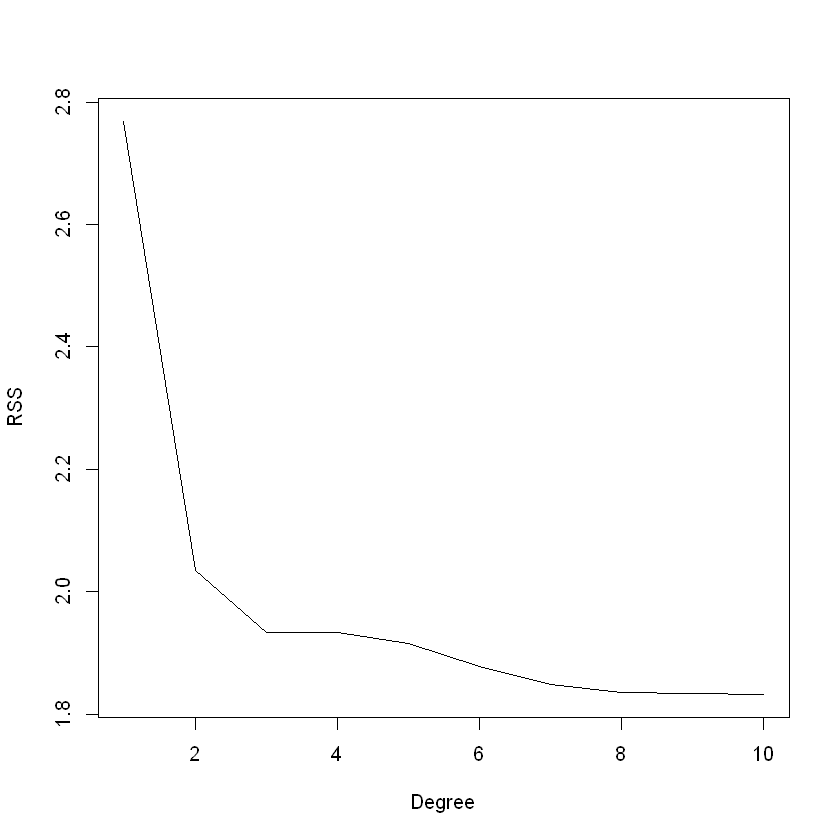

In [84]:
#Residual sum of squares
rss <- rep(NA, 10)

#loop from 1 to 10
for (i in 1:10) {
  fit <- lm(nox ~ poly(dis, i), data = Boston)
  rss[i] <- sum(fit$residuals ^ 2)
}

#plot
plot(1:10, rss, type = 'l', xlab = "Degree", ylab = "RSS")

* (c) Perform cross-validation or another approach to select the optimal degree for the polynomial, and explain your results.

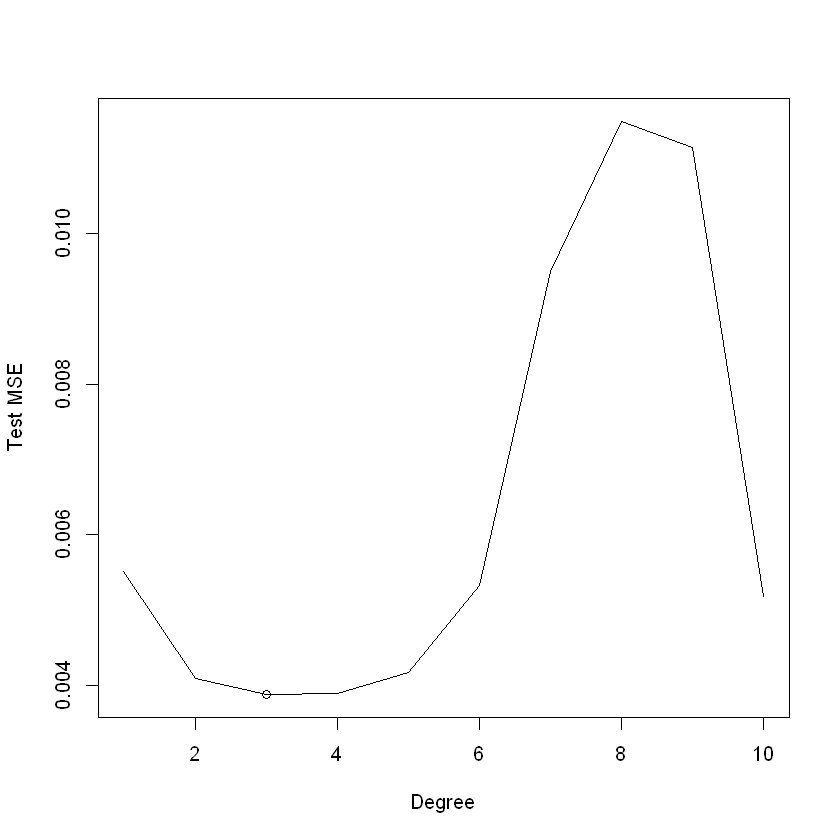

In [87]:
#Test MSE
testMSE <- rep(NA, 10)

#loop fit 10 times
for (i in 1:10) {
  fit <- glm(nox ~ poly(dis, i), data = Boston)
  testMSE[i] <- cv.glm(Boston, fit, K = 10)$delta[1]
}

#plot
plot(1:10, testMSE, type = 'l', xlab = "Degree", ylab = "Test MSE")
points(which.min(testMSE), testMSE[which.min(testMSE)])

* (d) Use the bs() function to fit a regression spline to predict nox using dis. Report the output for the fit using four degrees of freedom. How did you choose the knots? Plot the resulting fit.

* (e) Now fit a regression spline for a range of degrees of freedom, and plot the resulting fits and report the resulting RSS. Describe the results obtained.

* (f) Perform cross-validation or another approach in order to selectthe best degrees of freedom for a regression spline on this data. Describe your results.

This question relates to the College data set.
* (a) Split the data into a training set and a test set. Using out-of-state tuition as the response and the other variables as the predictors,perform forward stepwise selection on the training set in order to identify a satisfactory model that uses just a subset of the predictors.
* (b) Fit a GAM on the training data, using out-of-state tuition as the response and the features selected in the previous step as the predictors. Plot the results, and explain your findings.
* (c) Evaluate the model obtained on the test set, and explain the results obtained.
* (d) For which variables, if any, is there evidence of a non-linear relationship with the response?